In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [11]:
%%R 
library(readxl)
data <- read_excel("merged.xlsx") 
income_data <- data  


In [16]:
%%R 

bathroom_counts <- data %>%
  group_by(Borough) %>%
  summarise(NumberOfBathrooms = n())


In [17]:
%%R 
combined_data <- merge(bathroom_counts, median_income_data, by = "Borough")


In [18]:
%%R 
linear_model <- lm(MedianIncome ~ NumberOfBathrooms, data = combined_data)

# View the summary of the linear model to interpret results
summary(linear_model)



Call:
lm(formula = MedianIncome ~ NumberOfBathrooms, data = combined_data)

Residuals:
   Min     1Q Median     3Q    Max 
-64324 -29055  -5501  17617 173689 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       78168.287   7647.268  10.222   <2e-16 ***
NumberOfBathrooms    -3.662     17.640  -0.208    0.836    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 42760 on 561 degrees of freedom
  (51 observations deleted due to missingness)
Multiple R-squared:  7.681e-05,	Adjusted R-squared:  -0.001706 
F-statistic: 0.04309 on 1 and 561 DF,  p-value: 0.8356



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 51 rows containing non-finite values (`stat_smooth()`). 

R[write to console]: 2: Removed 51 rows containing missing values (`geom_point()`). 



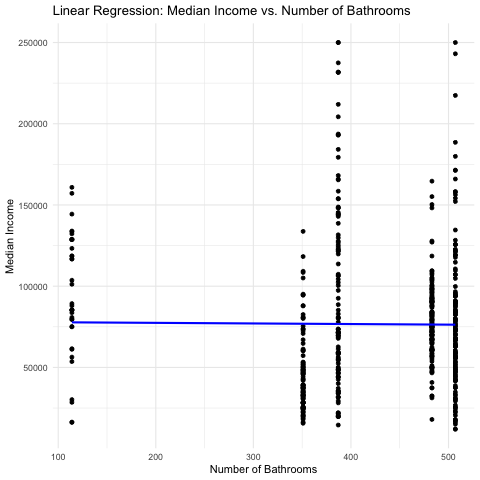

In [20]:
%%R 

library(ggplot2)

ggplot(combined_data, aes(x = NumberOfBathrooms, y = MedianIncome)) +
  geom_point() +  
  geom_smooth(method = "lm", se = FALSE, color = "blue") + 
  theme_minimal() +
  labs(title = "Linear Regression: Median Income vs. Number of Bathrooms",
       x = "Number of Bathrooms", 
       y = "Median Income")


In [14]:
%%R 
library(dplyr)


median_income_data <- income_data %>%
  dplyr::filter(variable == "med_inc") %>%
  dplyr::select(Borough, MedianIncome = estimate)

str(median_income_data)


tibble [614 × 2] (S3: tbl_df/tbl/data.frame)
 $ Borough     : chr [1:614] "Brooklyn" "Bronx" "Bronx" "Bronx" ...
 $ MedianIncome: num [1:614] 76767 24769 45982 45982 153854 ...


In [21]:
%%R 

linear_model <- lm(MedianIncome ~ NumberOfBathrooms, data = combined_data)


In [22]:
%%R 

model_summary <- summary(linear_model)
print(model_summary)



Call:
lm(formula = MedianIncome ~ NumberOfBathrooms, data = combined_data)

Residuals:
   Min     1Q Median     3Q    Max 
-64324 -29055  -5501  17617 173689 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       78168.287   7647.268  10.222   <2e-16 ***
NumberOfBathrooms    -3.662     17.640  -0.208    0.836    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 42760 on 561 degrees of freedom
  (51 observations deleted due to missingness)
Multiple R-squared:  7.681e-05,	Adjusted R-squared:  -0.001706 
F-statistic: 0.04309 on 1 and 561 DF,  p-value: 0.8356

